In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/lenovo/Documents/Projects/Weather-Analysis/weather_data.csv', parse_dates=['Date/Time'], date_format='%m/%d/%Y %H:%M')

In [3]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [4]:
df.shape

(8784, 8)

In [5]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [6]:
df = df.rename(columns={'Weather':'Weather-Conditions'})

In [7]:
df.dtypes

Date/Time             datetime64[ns]
Temp_C                       float64
Dew Point Temp_C             float64
Rel Hum_%                      int64
Wind Speed_km/h                int64
Visibility_km                float64
Press_kPa                    float64
Weather-Conditions            object
dtype: object

In [8]:
df.loc[0,'Date/Time']

Timestamp('2012-01-01 00:00:00')

In [9]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M')

In [10]:
df['Date/Time']

0      2012-01-01 00:00:00
1      2012-01-01 01:00:00
2      2012-01-01 02:00:00
3      2012-01-01 03:00:00
4      2012-01-01 04:00:00
               ...        
8779   2012-12-31 19:00:00
8780   2012-12-31 20:00:00
8781   2012-12-31 21:00:00
8782   2012-12-31 22:00:00
8783   2012-12-31 23:00:00
Name: Date/Time, Length: 8784, dtype: datetime64[ns]

In [11]:
df.loc[0,'Date/Time'].day_name()

'Sunday'

In [12]:
df.isna().sum()

Date/Time             0
Temp_C                0
Dew Point Temp_C      0
Rel Hum_%             0
Wind Speed_km/h       0
Visibility_km         0
Press_kPa             0
Weather-Conditions    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           8784 non-null   datetime64[ns]
 1   Temp_C              8784 non-null   float64       
 2   Dew Point Temp_C    8784 non-null   float64       
 3   Rel Hum_%           8784 non-null   int64         
 4   Wind Speed_km/h     8784 non-null   int64         
 5   Visibility_km       8784 non-null   float64       
 6   Press_kPa           8784 non-null   float64       
 7   Weather-Conditions  8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date/Time,8784,2012-07-01 23:30:00,2012-01-01 00:00:00,2012-04-01 11:45:00,2012-07-01 23:30:00,2012-10-01 11:15:00,2012-12-31 23:00:00,NaN
Temp_C,8784.0,8.798144,-23.3,0.1,9.3,18.8,33.0,11.687883
Dew Point Temp_C,8784.0,2.555294,-28.5,-5.9,3.3,11.8,24.4,10.883072
Rel Hum_%,8784.0,67.431694,18.0,56.0,68.0,81.0,100.0,16.918881
Wind Speed_km/h,8784.0,14.945469,0.0,9.0,13.0,20.0,83.0,8.688696
Visibility_km,8784.0,27.664447,0.2,24.1,25.0,25.0,48.3,12.622688
Press_kPa,8784.0,101.051623,97.52,100.56,101.07,101.59,103.65,0.844005


In [16]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather-Conditions
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [17]:
df.sort_values('Temp_C')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather-Conditions
344,2012-01-15 08:00:00,-23.3,-28.5,62,7,24.1,102.45,Clear
342,2012-01-15 06:00:00,-23.2,-28.5,62,7,25.0,102.28,Mostly Cloudy
343,2012-01-15 07:00:00,-22.8,-28.0,62,9,25.0,102.37,Mainly Clear
345,2012-01-15 09:00:00,-22.2,-27.8,60,9,48.3,102.57,Mainly Clear
338,2012-01-15 02:00:00,-21.4,-26.6,63,9,25.0,101.99,Cloudy
...,...,...,...,...,...,...,...,...
4694,2012-07-14 14:00:00,32.7,15.3,35,28,48.3,101.35,Mainly Clear
5199,2012-08-04 15:00:00,32.8,18.8,44,17,24.1,101.39,Clear
4696,2012-07-14 16:00:00,32.9,15.3,35,24,48.3,101.26,Mainly Clear
4143,2012-06-21 15:00:00,33.0,19.0,44,24,24.1,100.20,Mainly Clear


In [18]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather-Conditions'],
      dtype='object')

In [19]:
df_test = df[["Date/Time","Temp_C", "Rel Hum_%","Wind Speed_km/h"]]
df_test

,Date/Time,Temp_C,Rel Hum_%,Wind Speed_km/h
0,2012-01-01 00:00:00,-1.8,86,4
1,2012-01-01 01:00:00,-1.8,87,4
2,2012-01-01 02:00:00,-1.8,89,7
3,2012-01-01 03:00:00,-1.5,88,6
4,2012-01-01 04:00:00,-1.5,88,7
...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,81,30
8780,2012-12-31 20:00:00,0.2,83,24
8781,2012-12-31 21:00:00,-0.5,93,28
8782,2012-12-31 22:00:00,-0.2,89,28


<Axes: xlabel='Weather-Conditions', ylabel='Frequency'>

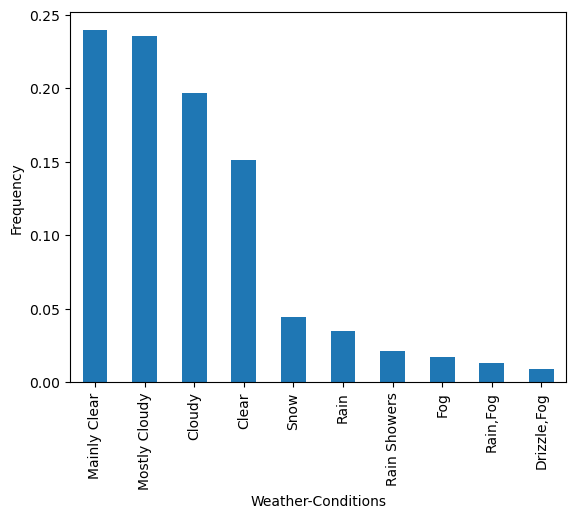

In [29]:
# Bar graph
df['Weather-Conditions'].value_counts(normalize=True) \
.head(10) \
.plot(kind='bar', ylabel='Frequency' ) 

In [30]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather-Conditions'],
      dtype='object')

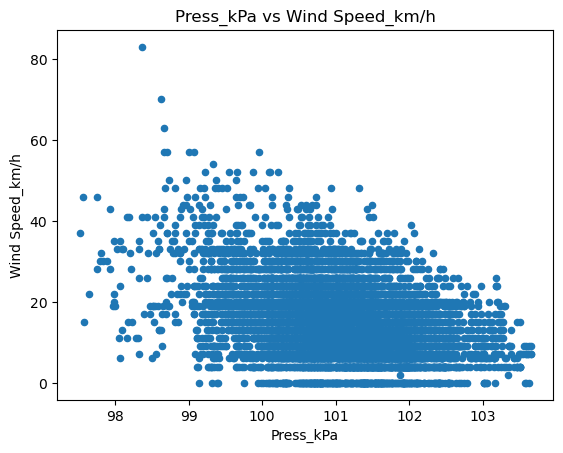

In [34]:
# Scatter plot
df.plot(kind='scatter', x='Press_kPa', y='Wind Speed_km/h', title='Press_kPa vs Wind Speed_km/h')
plt.show()

In [35]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather-Conditions'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

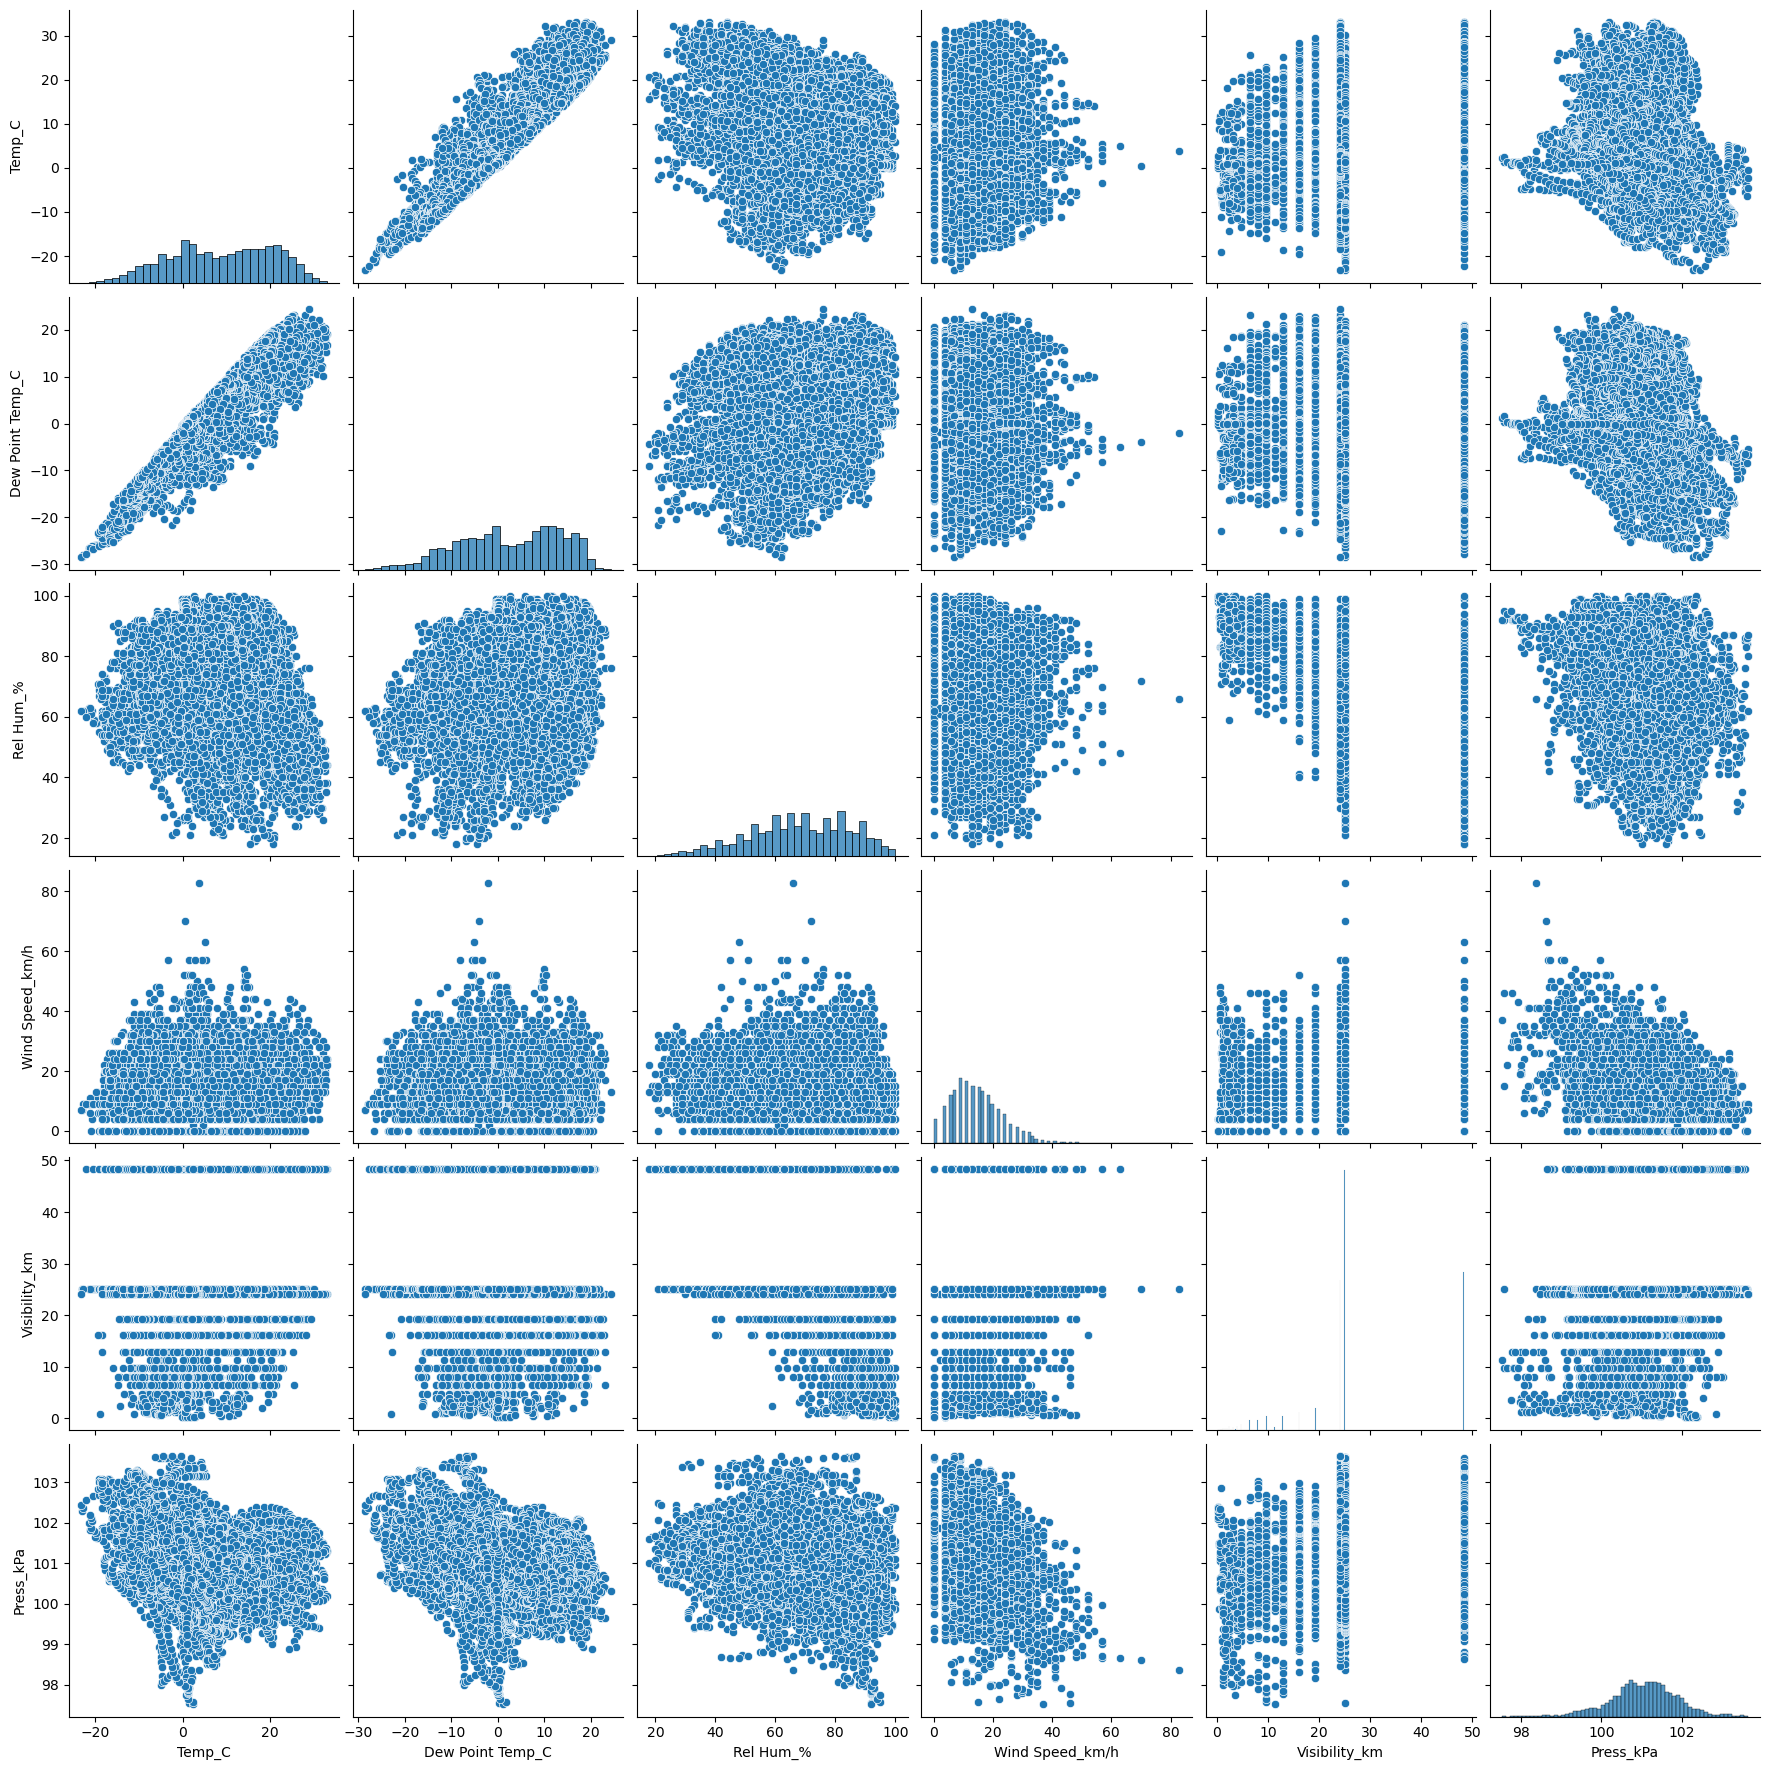

In [37]:
# Heatmaps
sns.pairplot(data=df,height=3)
plt.show()

In [39]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather-Conditions'],
      dtype='object')

In [45]:
df[['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']].corr()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


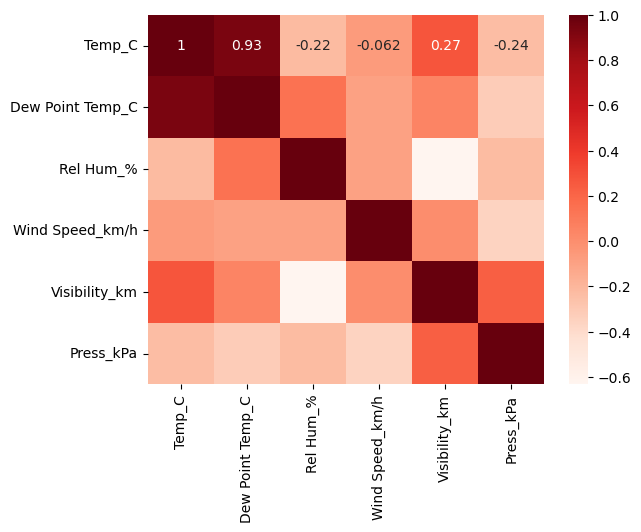

In [46]:
sns.heatmap(df[['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']].corr(), annot=True, cmap='Reds')
plt.show()